FB-22, Venher Pavlo, lab 5, part 1

Imports

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from scipy.signal import iirfilter, filtfilt

Part 1

main function

In [2]:
def harmonic_with_noise(t, amplitude, frequency, noise_covariance, phase=0, show_noise=True, cutoff_freq=0.1):
    global noise, last_noise_covariance, signal, noisy_signal, filtered_signal
    
    if noise_covariance != last_noise_covariance:
        noise = np.random.normal(0, np.sqrt(noise_covariance), len(t))
        last_noise_covariance = noise_covariance
    
    signal = amplitude * np.sin(2 * np.pi * frequency * t + phase)
    noisy_signal = signal + noise
    
    b, a = iirfilter(4, cutoff_freq, btype='lowpass', analog=False, ftype='butter')
    filtered_signal = filtfilt(b, a, noisy_signal)

    if show_noise != True:
        noisy_signal = signal

    return signal, noisy_signal, filtered_signal

In [3]:
def update_plot(sth=None):
    global t
    amplitude = amplitude_slider.value
    frequency = frequency_slider.value
    noise_covariance = noise_covariance_slider.value
    phase = phase_slider.value
    cutoff_freq = cutoff_freq_slider.value
    show_noise = show_noise_checkbox.value
    
    signal, noisy_signal, filtered_signal = harmonic_with_noise(t, amplitude, frequency, noise_covariance, phase, show_noise, cutoff_freq)
    
    line_signal.set_ydata(signal)
    line_noisy_signal.set_ydata(noisy_signal)
    line_filtered_signal.set_ydata(filtered_signal)
    
    ax1.relim()
    ax1.autoscale_view()
    ax2.relim()
    ax2.autoscale_view()
    fig.canvas.draw()

Reset button

In [4]:
def reset_values(sth=None):
    global amplitude_slider, frequency_slider, noise_covariance_slider, cutoff_freq_slider, show_noise_checkbox, def_val, phase_slider
    amplitude_slider.value = def_val['amplitude']
    frequency_slider.value = def_val['frequency']
    noise_covariance_slider.value = def_val['noise_covariance']
    cutoff_freq_slider.value = def_val['cutoff_freq']
    phase_slider.value = def_val['phase']
    show_noise_checkbox.value = def_val['show_noise']
    
    update_plot()

In [5]:
def create_plot():
    global t
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

    line_noisy_signal, = ax1.plot(t, noisy_signal, label='Noisy Signal', color='orange')
    line_signal, = ax1.plot(t, signal, label='Signal', color='blue')
    line_filtered_signal, = ax2.plot(t, filtered_signal, label='Filtered Signal', color='green')

    ax1.legend()
    ax1.set_title('signal')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('amplitude')
    ax1.grid(True)

    ax2.legend()
    ax2.set_xlabel('Time')
    ax2.set_ylabel('amplitude')
    ax2.set_title('filtered signal')
    ax2.grid(True)

    return fig, (ax1, ax2), line_signal, line_noisy_signal, line_filtered_signal

In [6]:
t = np.linspace(0, 1, 1000)

last_noise_covariance = 0.1
noise = np.random.normal(0, np.sqrt(last_noise_covariance), len(t))

def_val = {'amplitude': 1.0, 'frequency': 1.0, 'noise_covariance': 0.1, 'phase': 0, 'show_noise': True, 'cutoff_freq': 0.1}

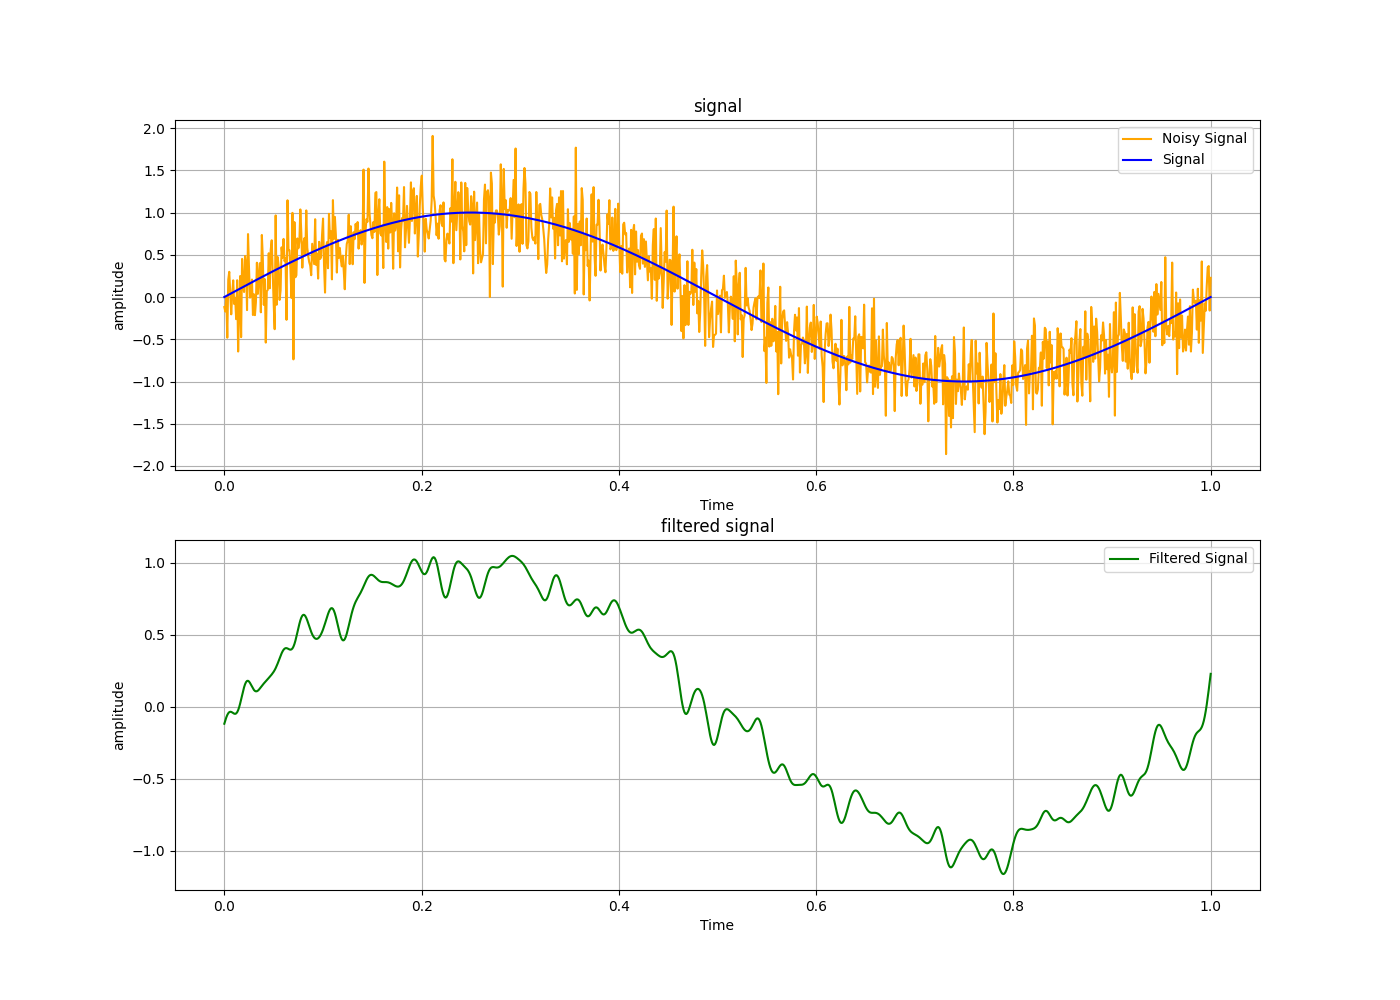

In [7]:
amplitude_slider = widgets.FloatSlider(value=def_val['amplitude'], min=0.1, max=5.0, step=0.1, description='Amplitude:')
frequency_slider = widgets.FloatSlider(value=def_val['frequency'], min=0.1, max=5.0, step=0.1, description='Frequency:')
noise_covariance_slider = widgets.FloatSlider(value=def_val['noise_covariance'], min=0.01, max=1.0, step=0.01, description='Noise Covariance:')
cutoff_freq_slider = widgets.FloatSlider(value=def_val['cutoff_freq'], min=0.01, max=0.5, step=0.01, description='Cutoff Frequency:')
phase_slider = widgets.FloatSlider(value=def_val['phase'], min=0, max=10, step=1, description='Phase:')
show_noise_checkbox = widgets.Checkbox(value=def_val['show_noise'], description='show noise')
reset_button = widgets.Button(description='Reset', tooltip='Reset to initial values', button_style='info')

signal, noisy_signal, filtered_signal = harmonic_with_noise(t, **def_val)

amplitude_slider.observe(update_plot, 'value')
frequency_slider.observe(update_plot, 'value')
noise_covariance_slider.observe(update_plot, 'value')
phase_slider.observe(update_plot, 'value')
cutoff_freq_slider.observe(update_plot, 'value')
show_noise_checkbox.observe(update_plot, 'value')

reset_button.on_click(reset_values)
reset_button.style.button_color = 'orange'
reset_button.layout.margin_left = '20px'

fig, (ax1, ax2), line_signal, line_noisy_signal, line_filtered_signal = create_plot()
display(widgets.VBox([widgets.HBox([amplitude_slider, frequency_slider, noise_covariance_slider, show_noise_checkbox]), widgets.HBox([cutoff_freq_slider, phase_slider, reset_button])]))